In [ ]:
from PIL import Image
from IPython.display import display
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
real_images_path = "C:\\Users\\nagas\\Desktop\\Capstone\\archive\\train\\REAL"
fake_images_path = "C:\\Users\\nagas\\Desktop\\Capstone\\archive\\train\\FAKE"
nvidia_images_path = "C:\\Users\\nagas\\Desktop\\Capstone\\Nvdia"
synthetic_images_path = "C:\\Users\\nagas\\Desktop\\Capstone\\synthetic"


In [ ]:
sample_real_image_path = os.path.join(real_images_path, os.listdir(real_images_path)[0])
sample_fake_image_path = os.path.join(fake_images_path, os.listdir(fake_images_path)[0])
sample_nvidia_image_path = os.path.join(nvidia_images_path, os.listdir(nvidia_images_path)[0])
sample_synthetic_image_path = os.path.join(synthetic_images_path, os.listdir(synthetic_images_path)[0])


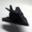

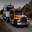

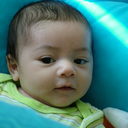

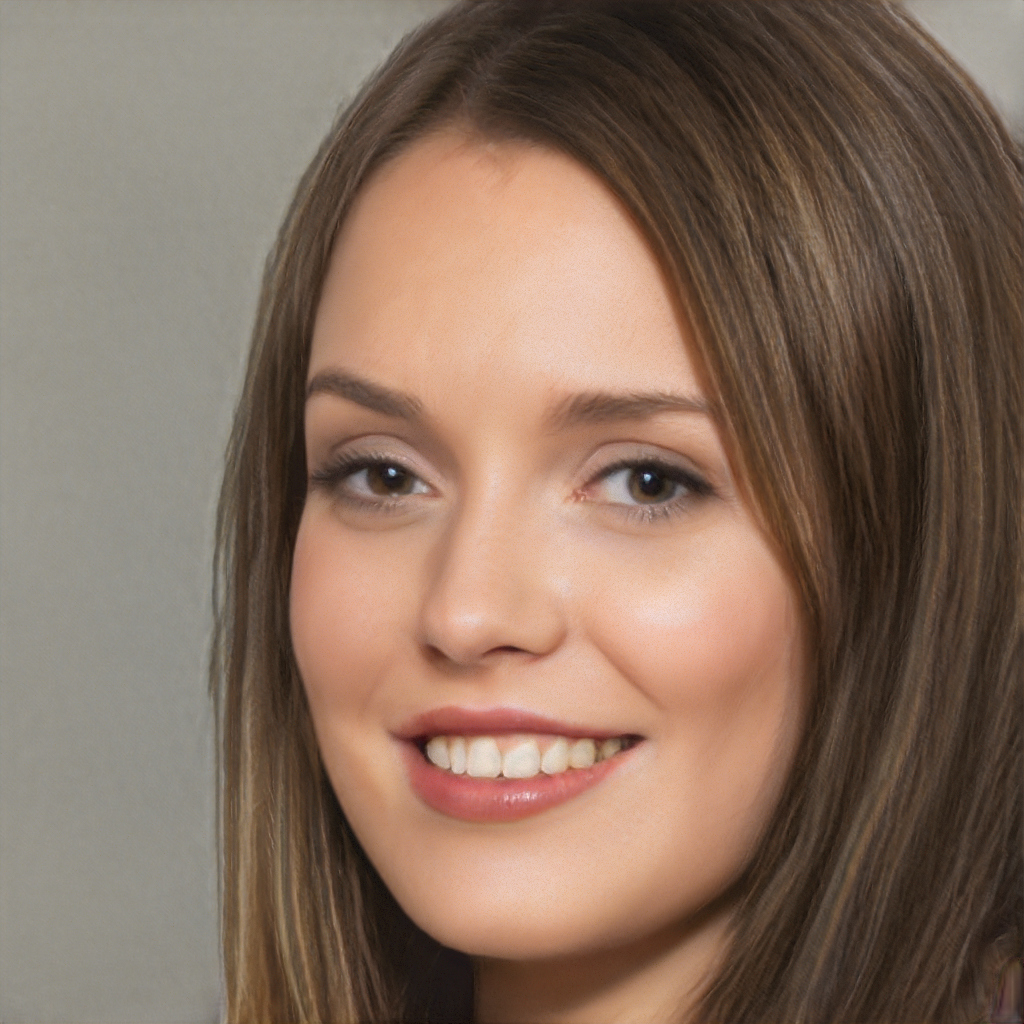

In [ ]:
sample_real_image = Image.open(sample_real_image_path)
sample_fake_image = Image.open(sample_fake_image_path)
sample_nvidia_image = Image.open(sample_nvidia_image_path)
sample_synthetic_image = Image.open(sample_synthetic_image_path)

# Display images
display(sample_real_image)
display(sample_fake_image)
display(sample_nvidia_image)
display(sample_synthetic_image)

## Basic Stats

In [ ]:
real_images = os.listdir(real_images_path)
fake_images = os.listdir(fake_images_path)
nvidia_images = os.listdir(nvidia_images_path)
synthetic_images = os.listdir(synthetic_images_path)

In [ ]:
print("Number of real images:", len(real_images))
print("Number of fake images:", len(fake_images))
print("Number of Nvidia images:", len(nvidia_images))
print("Number of synthetic images:", len(synthetic_images))

Number of real images: 49991
Number of fake images: 50000
Number of Nvidia images: 6060
Number of synthetic images: 10000


In [ ]:
'''real_image_dimensions = np.array([Image.open(os.path.join(real_images_path, img)).size for img in real_images])
fake_image_dimensions = np.array([Image.open(os.path.join(fake_images_path, img)).size for img in fake_images])
nvidia_image_dimensions = np.array([Image.open(os.path.join(nvidia_images_path, img)).size for img in nvidia_images])
synthetic_image_dimensions = np.array([Image.open(os.path.join(synthetic_images_path, img)).size for img in synthetic_images])

print("Real image dimensions (width, height):", np.mean(real_image_dimensions, axis=0))
print("Fake image dimensions (width, height):", np.mean(fake_image_dimensions, axis=0))
print("Nvidia image dimensions (width, height):", np.mean(nvidia_image_dimensions, axis=0))
print("Synthetic image dimensions (width, height):", np.mean(synthetic_image_dimensions, axis=0))'''

'real_image_dimensions = np.array([Image.open(os.path.join(real_images_path, img)).size for img in real_images])\nfake_image_dimensions = np.array([Image.open(os.path.join(fake_images_path, img)).size for img in fake_images])\nnvidia_image_dimensions = np.array([Image.open(os.path.join(nvidia_images_path, img)).size for img in nvidia_images])\nsynthetic_image_dimensions = np.array([Image.open(os.path.join(synthetic_images_path, img)).size for img in synthetic_images])\n\nprint("Real image dimensions (width, height):", np.mean(real_image_dimensions, axis=0))\nprint("Fake image dimensions (width, height):", np.mean(fake_image_dimensions, axis=0))\nprint("Nvidia image dimensions (width, height):", np.mean(nvidia_image_dimensions, axis=0))\nprint("Synthetic image dimensions (width, height):", np.mean(synthetic_image_dimensions, axis=0))'

In [ ]:
num_images_to_analyze = 500

real_images = os.listdir(real_images_path)[:num_images_to_analyze]
fake_images = os.listdir(fake_images_path)[:num_images_to_analyze]
nvidia_images = os.listdir(nvidia_images_path)[:50]  # Selecting 500 images from Nvidia
synthetic_images = os.listdir(synthetic_images_path)[:50]  # Selecting 500 images from synthetic


In [ ]:
real_image_dimensions = np.array([Image.open(os.path.join(real_images_path, img)).size for img in real_images])
fake_image_dimensions = np.array([Image.open(os.path.join(fake_images_path, img)).size for img in fake_images])
nvidia_image_dimensions = np.array([Image.open(os.path.join(nvidia_images_path, img)).size for img in nvidia_images])
synthetic_image_dimensions = np.array([Image.open(os.path.join(synthetic_images_path, img)).size for img in synthetic_images])

print("Real image dimensions (width, height):", np.mean(real_image_dimensions, axis=0))
print("Fake image dimensions (width, height):", np.mean(fake_image_dimensions, axis=0))
print("Nvidia image dimensions (width, height):", np.mean(nvidia_image_dimensions, axis=0))
print("Synthetic image dimensions (width, height):", np.mean(synthetic_image_dimensions, axis=0))


Real image dimensions (width, height): [32. 32.]
Fake image dimensions (width, height): [32. 32.]
Nvidia image dimensions (width, height): [128. 128.]
Synthetic image dimensions (width, height): [1024. 1024.]


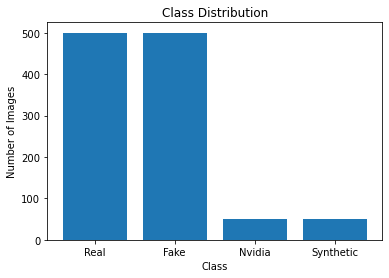

In [ ]:
class_distribution = {'Real': len(real_images), 'Fake': len(fake_images), 'Nvidia': len(nvidia_images), 'Synthetic': len(synthetic_images)}
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


## Image Histograms

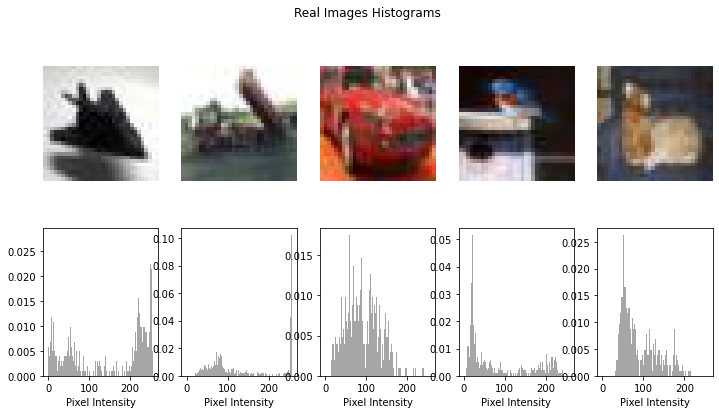

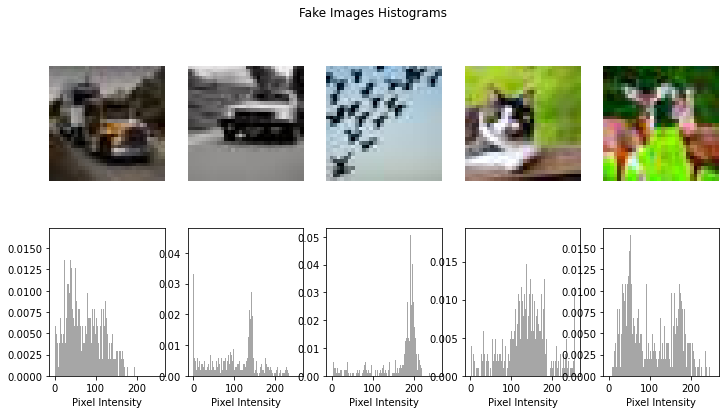

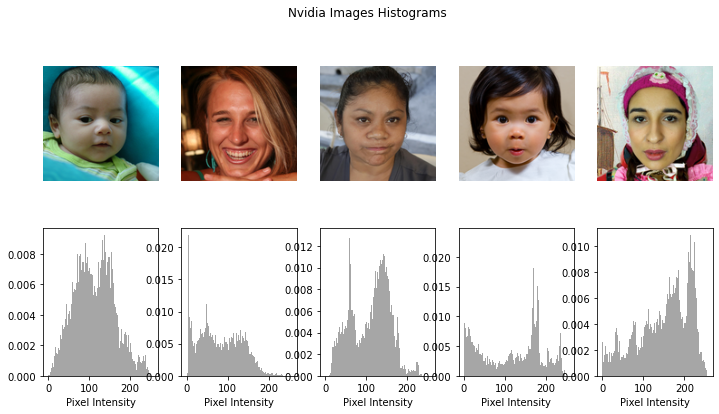

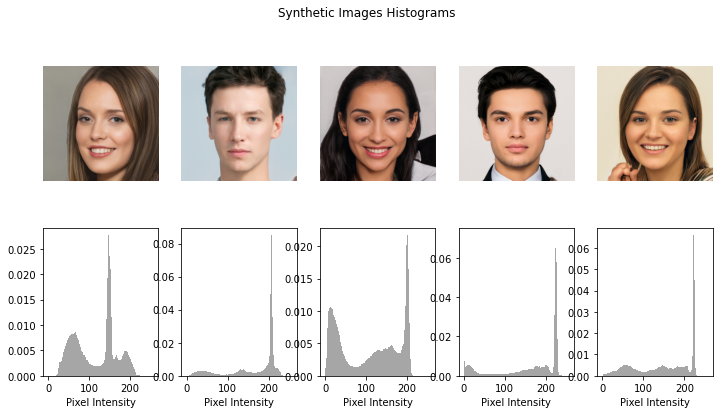

In [ ]:
def plot_histogram(image_folder, title):
    plt.figure(figsize=(12, 6))
    images = os.listdir(image_folder)[:5]
    for i, img in enumerate(images):
        img_path = os.path.join(image_folder, img)
        image = np.array(Image.open(img_path).convert("L")).ravel()
        plt.subplot(2, 5, i + 1)
        plt.imshow(Image.open(img_path))
        plt.axis("off")
        plt.subplot(2, 5, i + 6)
        plt.hist(image, bins=256, range=(0, 256), density=True, color='gray', alpha=0.7)
        plt.xlabel('Pixel Intensity')
    plt.suptitle(title)
    plt.show()

plot_histogram(real_images_path, "Real Images Histograms")
plot_histogram(fake_images_path, "Fake Images Histograms")
plot_histogram(nvidia_images_path, "Nvidia Images Histograms")
plot_histogram(synthetic_images_path, "Synthetic Images Histograms")


## Color Distribution

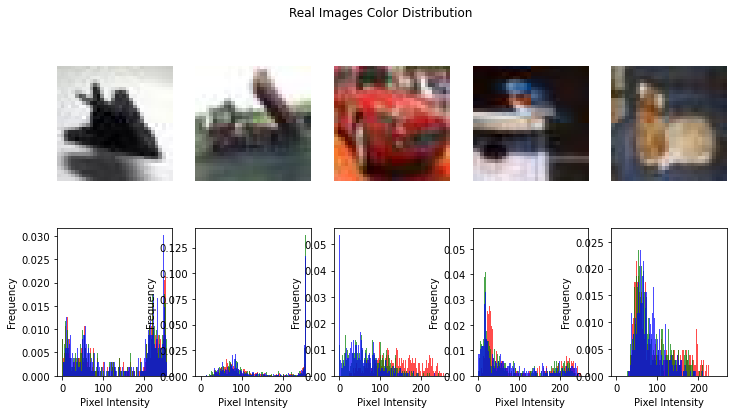

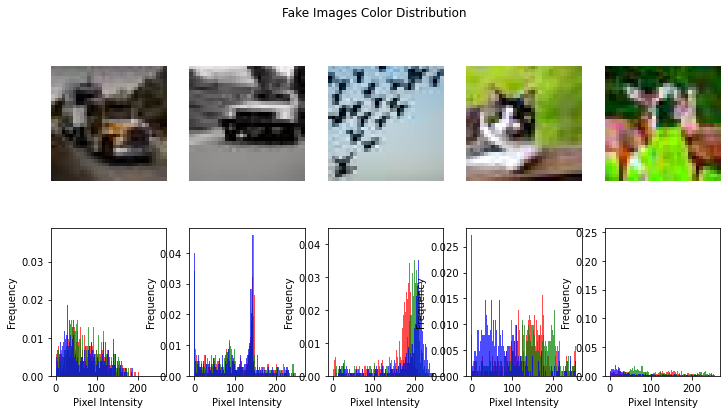

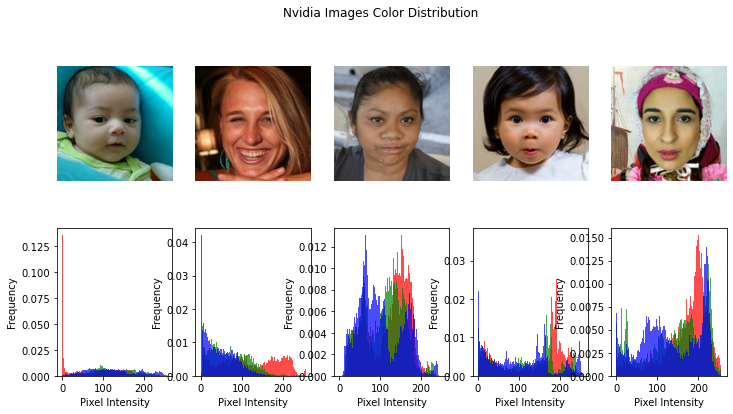

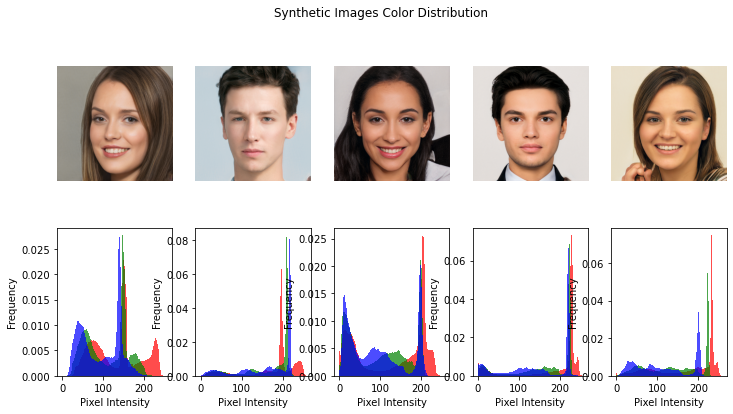

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_color_distribution(image_folder, title):
    plt.figure(figsize=(12, 6))
    images = os.listdir(image_folder)[:5]
    for i, img in enumerate(images):
        img_path = os.path.join(image_folder, img)
        image = np.array(Image.open(img_path))

        plt.subplot(2, 5, i + 1)
        plt.imshow(image)
        plt.axis("off")

        for channel, color in zip(range(image.shape[2]), ['red', 'green', 'blue']):
            plt.subplot(2, 5, i + 6)
            plt.hist(image[:, :, channel].flatten(), bins=256, range=(0, 256), density=True, color=color, alpha=0.7)
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')

    plt.suptitle(title)
    plt.show()

plot_color_distribution(real_images_path, "Real Images Color Distribution")
plot_color_distribution(fake_images_path, "Fake Images Color Distribution")
plot_color_distribution(nvidia_images_path, "Nvidia Images Color Distribution")
plot_color_distribution(synthetic_images_path, "Synthetic Images Color Distribution")


## Texture Analysis

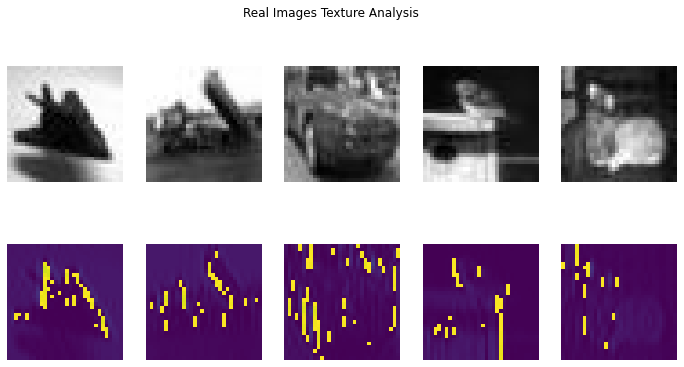

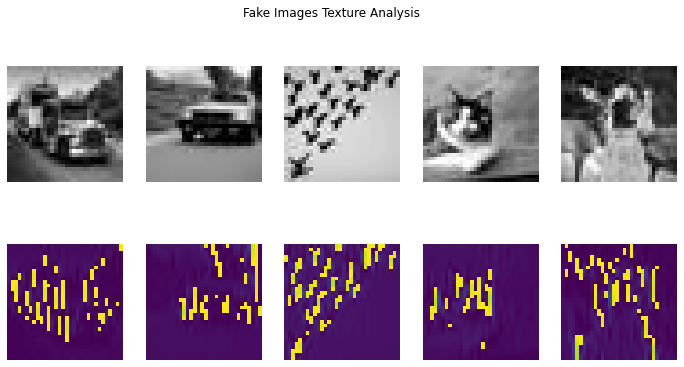

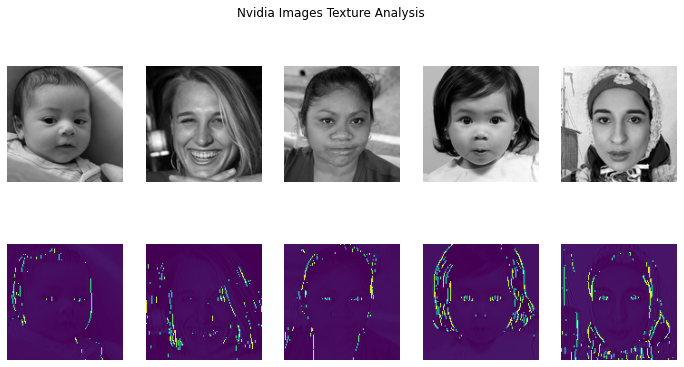

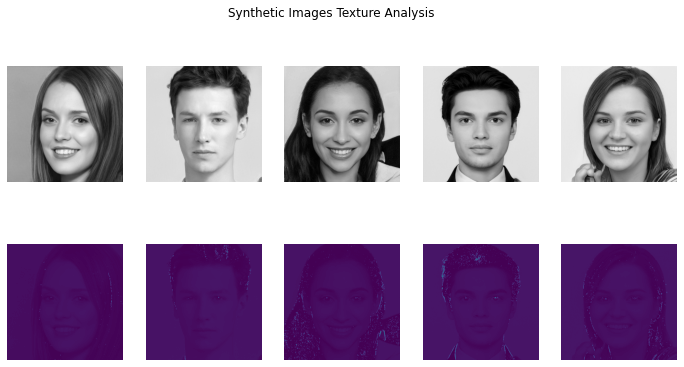

In [ ]:
from skimage.filters import gabor
from skimage import color

def plot_texture_analysis(image_folder, title):
    plt.figure(figsize=(12, 6))
    images = os.listdir(image_folder)[:5]
    for i, img in enumerate(images):
        img_path = os.path.join(image_folder, img)
        image = np.array(Image.open(img_path).convert("L"))
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis("off")
        plt.subplot(2, 5, i + 6)
        features, _ = gabor(image, frequency=0.6)
        plt.imshow(features, cmap='viridis')
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_texture_analysis(real_images_path, "Real Images Texture Analysis")
plot_texture_analysis(fake_images_path, "Fake Images Texture Analysis")
plot_texture_analysis(nvidia_images_path, "Nvidia Images Texture Analysis")
plot_texture_analysis(synthetic_images_path, "Synthetic Images Texture Analysis")
